**ESPECIALIZACIÓN EN CIENCIA DE DATOS E INTELIGENCIA ARTIFICIAL**

*Estudiantes*

Jonatan Andres Londoño Taborda

Felipe Londoño Mendoza


---

## Compresión de los datos

Este conjunto de datos analiza diversos índices de costo de vida relativos a la ciudad de Nueva York (NYC), la cual tiene un índice base del 100%.

A continuación, se presenta una descripción de cada índice y su significado:

- **Índice del Costo de Vida excluyendo alquiler (Cost of Living Index):** Este índice indica los precios relativos de bienes de consumo como alimentos, restaurantes, transporte y servicios públicos, excluyendo los gastos de alojamiento como el alquiler o la hipoteca. Por ejemplo, una ciudad con un índice de costo de vida de 120 se estima que es un 20% más cara que la ciudad de Nueva York (excluyendo el alquiler).

- **Índice de Alquiler (Rent Index):** Este índice estima los precios de alquiler de apartamentos en una ciudad en comparación con la ciudad de Nueva York. Si el índice de alquiler es 80, sugiere que los precios promedio de alquiler en esa ciudad son aproximadamente un 20% más bajos que en Nueva York.

- **Índice de Costo de Vida más Alquiler (Cost of Living Plus Rent Index):** Este índice estima el costo de bienes de consumo incluyendo el alquiler, en comparación con la ciudad de Nueva York.

- **Índice de Alimentos (Groceries Index):** Este índice proporciona una estimación de los precios de productos de supermercado en una ciudad con respecto a Nueva York. Numbeo utiliza pesos de productos del apartado “Mercados” para calcular este índice en cada ciudad.

- **Índice de Restaurantes (Restaurant Price Index):** Este índice compara los precios de comidas y bebidas en restaurantes y bares con los de la ciudad de Nueva York.

- **Poder Adquisitivo Local (Local Purchasing Power Index):** Este índice indica el poder adquisitivo relativo en una ciudad determinada, basado en el salario neto promedio. Un poder adquisitivo doméstico de 40 significa que los residentes con un salario promedio pueden adquirir, en promedio, un 60% menos de bienes y servicios en comparación con los residentes de la ciudad de Nueva York con un salario promedio.


In [263]:
import pandas as pd

In [264]:
Ruta = "Cost_of_Living_Index_by_Country_2024_with_continent.csv"

# Leer el archivo con pandas
datos = pd.read_csv(Ruta,sep=',')

datos.head()

,Rank,Country,Continent,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,Europe,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,North America,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,Europe,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,Asia,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,North America,76.6,19.0,48.9,80.8,69.4,43.5


In [265]:
#Resumen de las variables
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Continent                       121 non-null    object 
 3   Cost of Living Index            121 non-null    float64
 4   Rent Index                      121 non-null    float64
 5   Cost of Living Plus Rent Index  121 non-null    float64
 6   Groceries Index                 121 non-null    float64
 7   Restaurant Price Index          121 non-null    float64
 8   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 8.6+ KB


In [266]:
#Cargar las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Para transformar y estandarizar datos (Media 0, Desvesta = 1)
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.tsaplots import plot_acf

In [267]:
# #El resumen estadístico de nuestro conjunto de datos total.
datos.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


<Axes: >

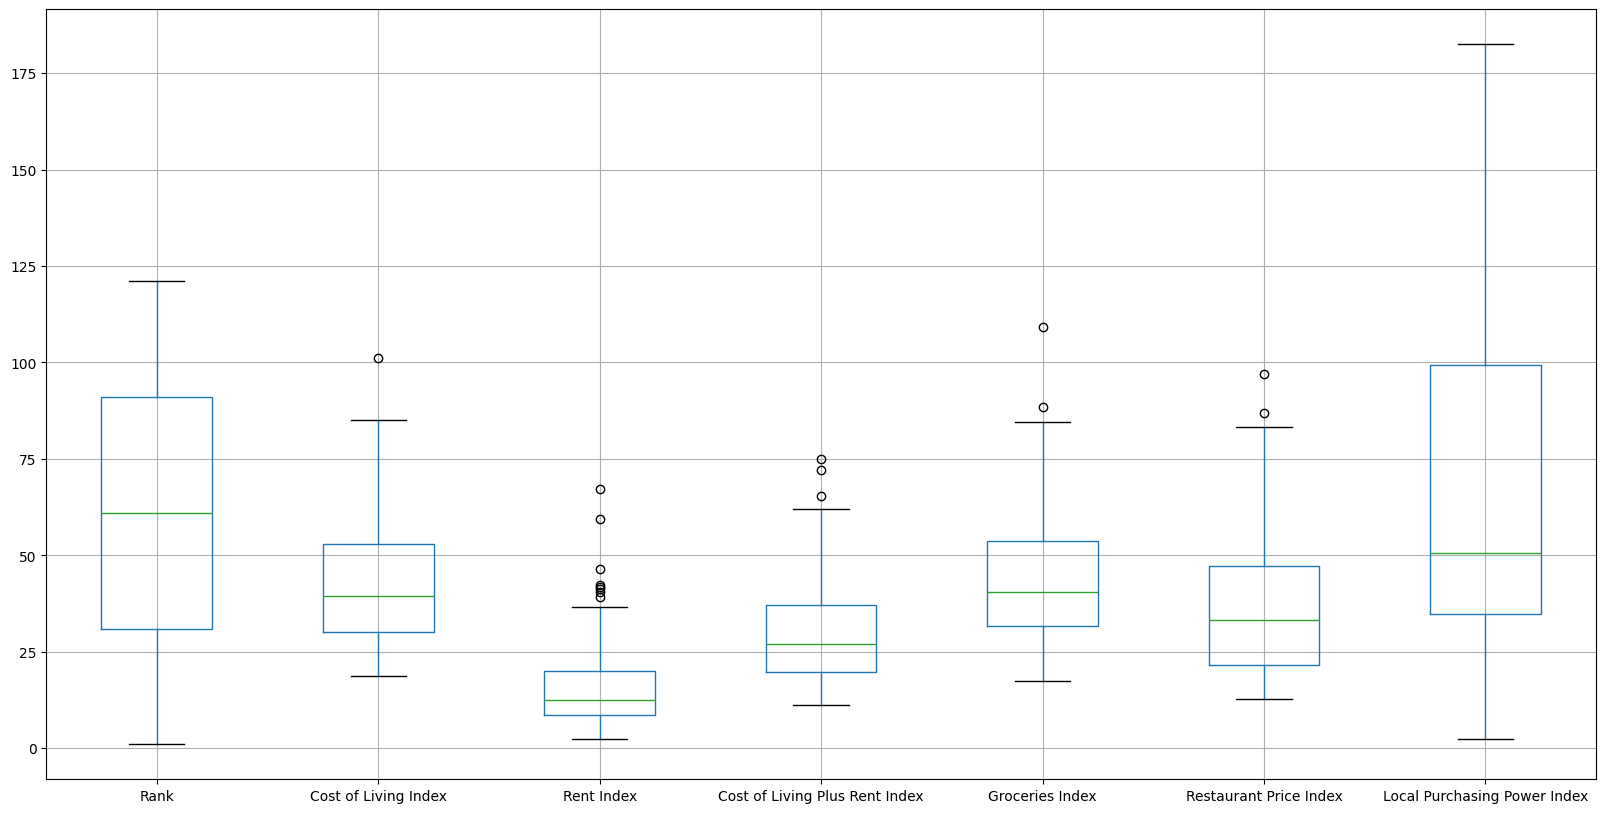

In [268]:
datos.boxplot(figsize=(20,10)) # la escala de amplitud de los datos es amplia

In [269]:
#Separar las variables continuas de las demás
continuas=datos[["Cost of Living Index","Rent Index","Cost of Living Plus Rent Index","Groceries Index","Restaurant Price Index","Local Purchasing Power Index"]]
correlation_matrix=continuas.corr()

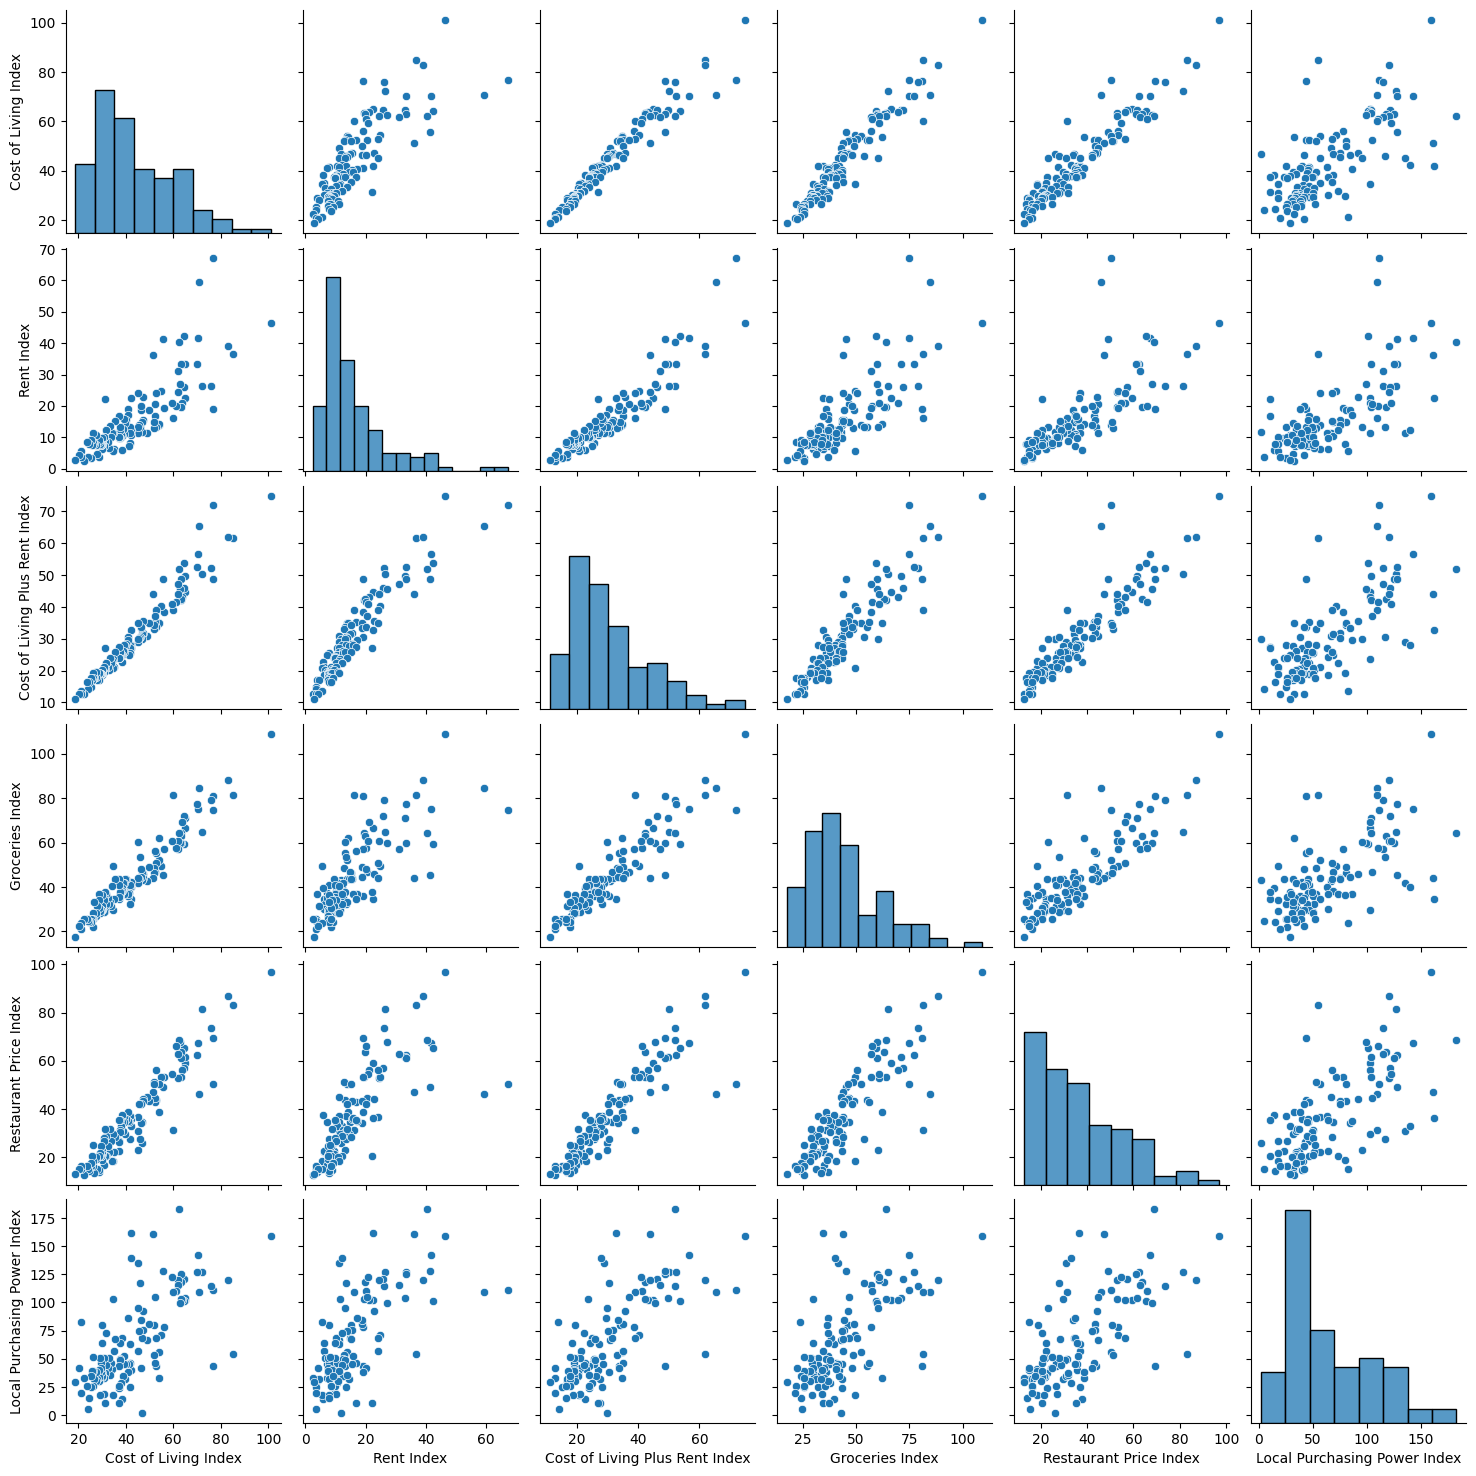

In [270]:
sns.pairplot(continuas) # Des

Axes(0.125,0.11;0.62x0.77)


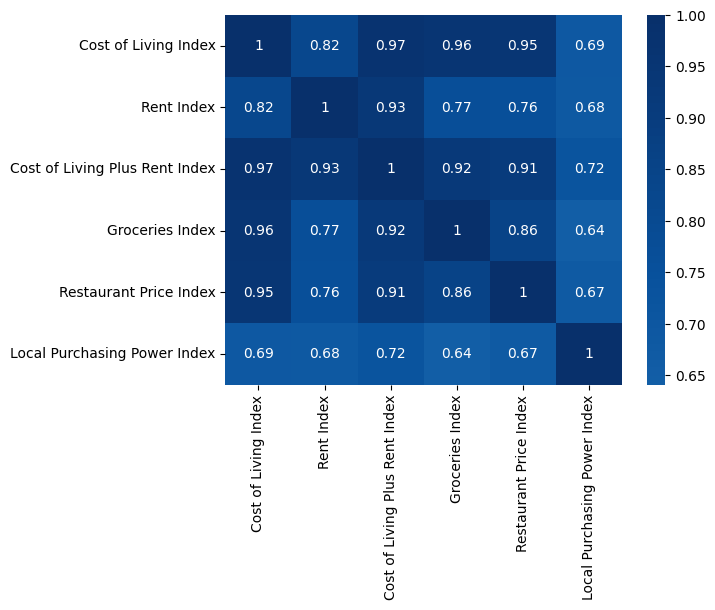

In [271]:
#Se calcula la matriz de correlación
print(sns.heatmap(correlation_matrix, annot=True, cmap="Blues", center=0))#adicionar descripción

El objetivo es indagar si el indeice del poder adquisitivo aporta al incremento del indice de costo de vida sin incluir el arrendamiento (si tiene una relación lineal con la otra variable)

<Axes: xlabel='Cost of Living Index', ylabel='Continent'>

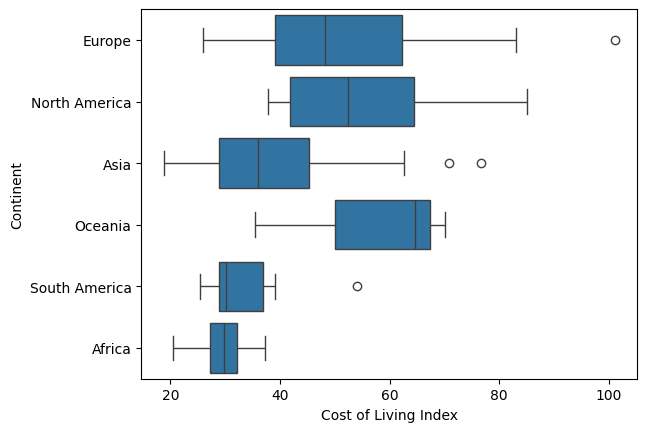

In [272]:
# 'BOX PLOT' Diagrama de caja y bigotes por continente y el inidice de costo de vida excluyendo el alquiler
sns.boxplot(x = 'Cost of Living Index', y = 'Continent', data = datos)

### Regresión lineal

In [273]:
variableDependiente = 'Cost of Living Plus Rent Index'

#Cost of Living Index - Rent Index-Groceries Index - Restaurant Price Index - Local Purchasing Power Index
variableIndependiente = 'Restaurant Price Index'

Text(0.5, 1.0, 'Histograma')

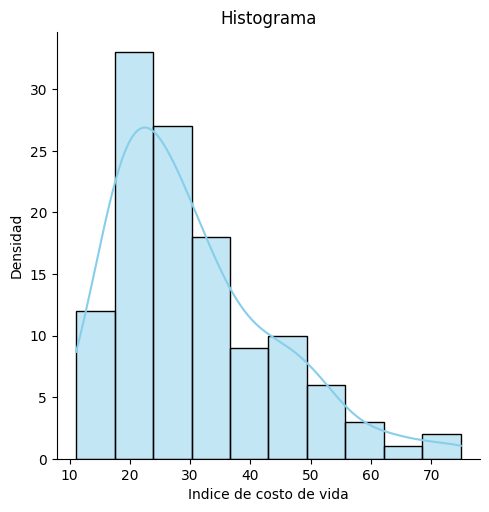

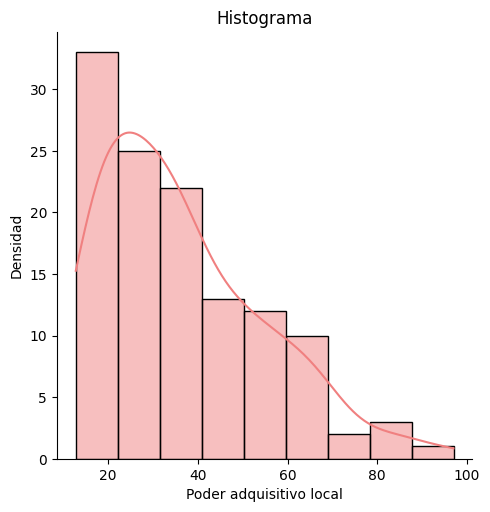

In [274]:
sns.displot(datos[variableDependiente], color='skyblue', kde=True) # Se puede remover el argumento 'bins'
plt.xlabel('Indice de costo de vida')
plt.ylabel('Densidad')
plt.title('Histograma')

sns.displot(datos[variableIndependiente], color='lightcoral', kde=True) # Se puede remover el argumento 'bins'
plt.xlabel('Poder adquisitivo local')
plt.ylabel('Densidad')
plt.title('Histograma')


 Poder adquisitivo local


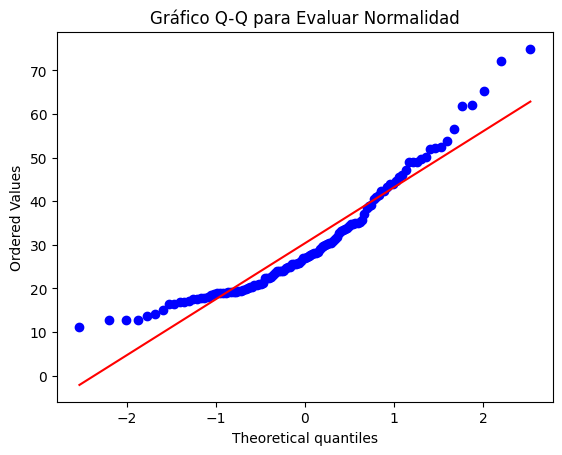


 Indice de costo de vida


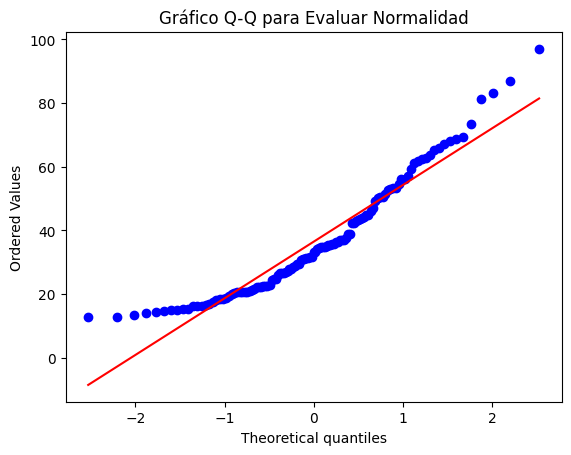

In [275]:
# Q-Q Plot
st.probplot(datos[variableDependiente], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para Evaluar Normalidad")
print('\n', 'Poder adquisitivo local')
plt.show()

st.probplot(datos[variableIndependiente], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para Evaluar Normalidad")
print('\n', 'Indice de costo de vida')
plt.show()

In [276]:
def prueba_shapiro_wilk(serie1, serie2):
    # Prueba de Shapiro-Wilk, esta prueba nos permite saber si los datos siguen una distribución normal a través de una prueba de hipotesis
    alfa = 0.05  # Nivel de significancia
    estadistico1, valor_p1 = st.shapiro(serie1)
    estadistico2, valor_p2 = st.shapiro(serie2)

    # Mostrar resultados para variable 1
    print(f"Variable: {serie1.name}")
    print(f"Estadístico de prueba: {estadistico1:.4f}")
    print(f"Valor p: {valor_p1:.4f}")
    print(f"Nivel de significancia: {alfa:.2f}")

    # Interpretación
    print(f'H_0: La variable [{serie1.name}] sigue una distribución normal.')
    print(f'H_1: La variable [{serie1.name}] no sigue una distribución normal.')
    if valor_p1 > alfa:
        print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal.", '\n')
    else:
        print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.", '\n')

    # Mostrar resultados para variable 2
    print(f"Variable: {serie2.name}")
    print(f"Estadístico de prueba: {estadistico2:.4f}")
    print(f"Valor p: {valor_p2:.4f}")
    print(f"Nivel de significancia: {alfa:.2f}")

    # Interpretación
    print(f'H_0: La variable [{serie2.name}] sigue una distribución normal.')
    print(f'H_1: La variable [{serie2.name}] no sigue una distribución normal.')
    if valor_p2 > alfa:
        print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal.")
    else:
        print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")

In [277]:
prueba_shapiro_wilk(datos[variableDependiente], datos[variableIndependiente])

Variable: Cost of Living Plus Rent Index
Estadístico de prueba: 0.9115
Valor p: 0.0000
Nivel de significancia: 0.05
H_0: La variable [Cost of Living Plus Rent Index] sigue una distribución normal.
H_1: La variable [Cost of Living Plus Rent Index] no sigue una distribución normal.
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal. 

Variable: Restaurant Price Index
Estadístico de prueba: 0.9215
Valor p: 0.0000
Nivel de significancia: 0.05
H_0: La variable [Restaurant Price Index] sigue una distribución normal.
H_1: La variable [Restaurant Price Index] no sigue una distribución normal.
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.


In [278]:
labels = {0: "Rank",
          1: "Cost of Living Index",
          2: "Rent Index",
          3: "Cost of Living Plus Rent Index",
          4: "Groceries Index",
          5: "Restaurant Price Index",
          6: "Local Purchasing Power Index"}

Estandarización

In [279]:
escala = StandardScaler()

#la idea es entandarizar solo las variables que voy a trabajar debido a que una vez probado el test no se dio la normalidad

datos_estandarizados = pd.DataFrame( escala.fit_transform(datos.select_dtypes(include='number')))
datos_estandarizados.rename(columns= labels, inplace=True)
datos_estandarizados

#POner los label

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,-1.717795,3.578488,2.679021,3.372158,3.819431,3.328965,2.375465
1,-1.689165,2.577288,1.816726,2.380394,2.200306,2.575493,-0.266315
2,-1.660535,2.452916,2.036699,2.395536,2.600672,2.767986,1.400976
3,-1.631905,2.061142,4.500401,3.160178,1.788166,0.766062,1.167504
4,-1.603275,2.054923,0.259314,1.403773,2.153205,1.811022,-0.548004
...,...,...,...,...,...,...,...
116,1.603275,-1.309356,-1.201309,-1.329254,-1.090932,-1.301860,-0.811928
117,1.631905,-1.390198,-0.919743,-1.261118,-1.202799,-1.175365,0.444250
118,1.660535,-1.402635,-1.086923,-1.336825,-1.355880,-1.114867,-1.144371
119,1.689165,-1.439947,-1.034129,-1.336825,-1.297003,-1.169865,-0.586070


In [280]:
datos_estandarizados.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02
mean,3.303143e-17,1.413011e-16,1.651571e-16,2.018587e-16,-1.045995e-16,2.697567e-16,-1.578168e-16
std,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00
min,-1.717795e+00,-1.539445e+00,-1.201309e+00,-1.457956e+00,-1.573726e+00,-1.301860e+00,-1.593550e+00
25%,-8.588975e-01,-8.305213e-01,-6.645741e-01,-7.993044e-01,-7.435565e-01,-8.178781e-01,-7.687863e-01
50%,0.000000e+00,-2.521886e-01,-3.214157e-01,-2.542132e-01,-2.195489e-01,-1.854021e-01,-3.678245e-01
75%,8.588975e-01,5.748893e-01,3.561024e-01,5.028579e-01,5.576309e-01,5.900686e-01,8.705893e-01
max,1.717795e+00,3.578488e+00,4.500401e+00,3.372158e+00,3.819431e+00,3.328965e+00,2.979446e+00


Text(0.5, 1.0, 'Histograma')

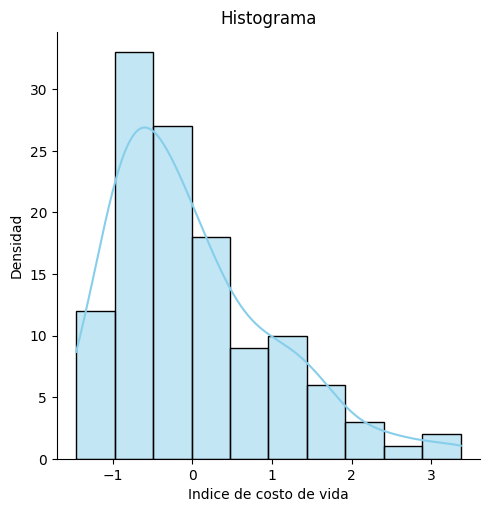

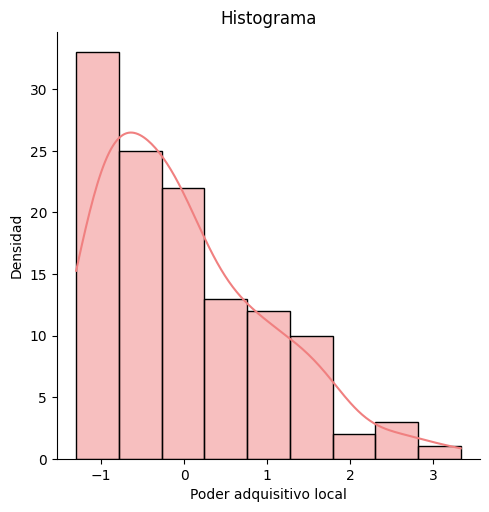

In [281]:
sns.displot(datos_estandarizados[variableDependiente], color='skyblue', kde=True) # Se puede remover el argumento 'bins'
plt.xlabel('Indice de costo de vida')
plt.ylabel('Densidad')
plt.title('Histograma')

sns.displot(datos_estandarizados[variableIndependiente], color='lightcoral', kde=True) # Se puede remover el argumento 'bins'
plt.xlabel('Poder adquisitivo local')
plt.ylabel('Densidad')
plt.title('Histograma')

In [282]:
prueba_shapiro_wilk(datos_estandarizados[variableDependiente],datos_estandarizados[variableIndependiente])

Variable: Cost of Living Plus Rent Index
Estadístico de prueba: 0.9115
Valor p: 0.0000
Nivel de significancia: 0.05
H_0: La variable [Cost of Living Plus Rent Index] sigue una distribución normal.
H_1: La variable [Cost of Living Plus Rent Index] no sigue una distribución normal.
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal. 

Variable: Restaurant Price Index
Estadístico de prueba: 0.9215
Valor p: 0.0000
Nivel de significancia: 0.05
H_0: La variable [Restaurant Price Index] sigue una distribución normal.
H_1: La variable [Restaurant Price Index] no sigue una distribución normal.
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.


Se intenta con el método box-cox

In [283]:
#transfomración box-cox
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='box-cox')

datos_box_cox = pd.DataFrame(transformer.fit_transform(datos.select_dtypes(include='number')))
datos_box_cox.rename(columns= labels, inplace=True)


In [284]:
datos_box_cox

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,-2.082241,2.355095,1.950203,2.204659,2.385183,2.175345,1.900782
1,-2.004402,1.945687,1.594674,1.824333,1.763267,1.884846,-0.079545
2,-1.937380,1.888296,1.693917,1.830868,1.940544,1.963650,1.309122
3,-1.876539,1.695930,2.498437,2.130654,1.559090,0.905870,1.150141
4,-1.819917,1.692723,0.592609,1.337192,1.741127,1.532785,-0.409315
...,...,...,...,...,...,...,...
116,1.461992,-1.748850,-2.686017,-2.035966,-1.380399,-1.930287,-0.770679
117,1.484397,-1.940049,-1.319153,-1.838018,-1.634059,-1.574984,0.597428
118,1.506748,-1.970725,-1.983461,-2.059019,-2.028231,-1.424933,-1.348186
119,1.529046,-2.064925,-1.741632,-2.059019,-1.869412,-1.560870,-0.457801


In [285]:
datos_box_cox.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02
mean,1.541467e-16,6.863197e-16,-6.973302e-16,3.115965e-15,-3.677499e-15,-9.450659e-16,3.073758e-16
std,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00
min,-2.082241e+00,-2.333507e+00,-2.686017e+00,-2.461560e+00,-2.715187e+00,-1.930287e+00,-2.898948e+00
25%,-7.872872e-01,-8.381581e-01,-6.583881e-01,-8.187895e-01,-7.283753e-01,-8.180267e-01,-7.071500e-01
50%,9.585172e-02,-5.592059e-02,-6.739161e-02,-2.668485e-02,-1.014061e-03,6.210283e-02,-1.930477e-01
75%,8.583474e-01,7.407998e-01,6.790354e-01,7.206571e-01,7.579276e-01,7.757213e-01,9.354951e-01
max,1.551291e+00,2.355095e+00,2.498437e+00,2.204659e+00,2.385183e+00,2.175345e+00,2.223089e+00


In [286]:
prueba_shapiro_wilk(datos_box_cox[variableDependiente],datos_box_cox[variableIndependiente])

Variable: Cost of Living Plus Rent Index
Estadístico de prueba: 0.9885
Valor p: 0.4056
Nivel de significancia: 0.05
H_0: La variable [Cost of Living Plus Rent Index] sigue una distribución normal.
H_1: La variable [Cost of Living Plus Rent Index] no sigue una distribución normal.
No se rechaza la hipótesis nula: Los datos siguen una distribución normal. 

Variable: Restaurant Price Index
Estadístico de prueba: 0.9794
Valor p: 0.0612
Nivel de significancia: 0.05
H_0: La variable [Restaurant Price Index] sigue una distribución normal.
H_1: La variable [Restaurant Price Index] no sigue una distribución normal.
No se rechaza la hipótesis nula: Los datos siguen una distribución normal.


# Modelo de regresión lineal (Simple)

In [287]:
x = sm.add_constant(datos_box_cox[variableIndependiente]) #Variable independiente
y = datos_box_cox[variableDependiente] #Variable dependiente

Se constrye el modelo

In [288]:
# construir modelo lineal
modelo = sm.OLS(y, x)
# ajustar el modelo
resultado = modelo.fit() #  Es el equivalente a estimar los parámetros del modelo en función de los datos de entrada.
# ver descripcion del modelo
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Cost of Living Plus Rent Index   R-squared:                       0.871
Model:                                        OLS   Adj. R-squared:                  0.870
Method:                             Least Squares   F-statistic:                     804.2
Date:                            Sun, 13 Apr 2025   Prob (F-statistic):           8.94e-55
Time:                                    12:10:53   Log-Likelihood:                -47.741
No. Observations:                             121   AIC:                             99.48
Df Residuals:                                 119   BIC:                             105.1
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.261e-15      0.033   9.91e-14      1.000      -0.065       0.065
Restaurant Price Index     0.9333      0.033     28.359      0.000       0.868       0.998
==============================================================================
Omnibus:                       20.166   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.087
Skew:                           0.836   Prob(JB):                     4.83e-07
Kurtosis:                       4.725   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

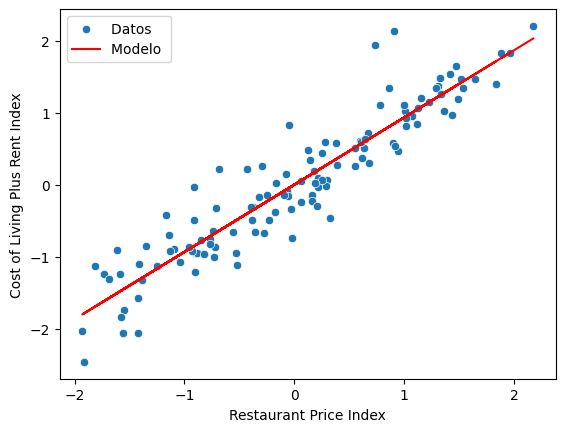

In [289]:
# los datos ( utilizando seaborn )
ax = sns.scatterplot (x=variableIndependiente, y=variableDependiente, data =datos_box_cox, label ='Datos ')
ax.set(xlabel =variableIndependiente, ylabel =variableDependiente)

# el modelo
ax.plot(datos_box_cox[variableIndependiente] , resultado . predict(), 'r-', label ='Modelo ')

# agregar leyenda
ax.legend()

Linealidad

In [290]:
# prueba de hipotesis de linealidad
tval , pval = sms.linear_harvey_collier(resultado)
print(pval)

9.880328191746973e-14


Residuos normales

In [291]:
# hacer la prueba de normalidad a los residuos
tval , pval = st.shapiro(resultado.resid)
print(pval)

0.0003831497132955725


Residuos aleatorios

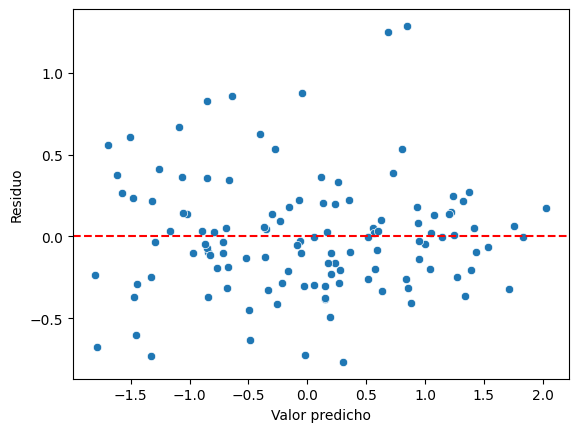

In [292]:
# copiar valores predichos
pred_val = resultado.fittedvalues.copy()

# dibujar con seaborn
ax = sns.scatterplot (x=pred_val , y=resultado.resid)
ax.set(xlabel ='Valor predicho', ylabel ='Residuo')
ax.axhline(y=0, linestyle ='--', color ='r')

Homocedasticidad

In [293]:
# esta prueba esta en statsmodels.stats.api
prueba = sms.het_breuschpagan(resultado.resid, resultado.model.exog)

# el valor-p es el segundo que entrega la salida de este test
print(prueba[1])

0.3056848630544142


Autocorrelación

Text(0.5, 1.0, '')

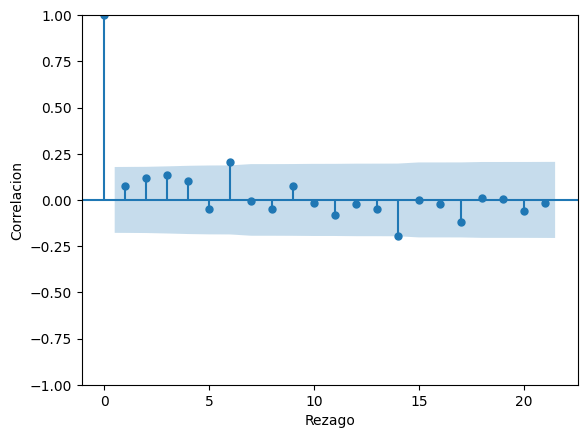

In [294]:
# dibujar
fig = plot_acf(resultado.resid)
plt.xlabel('Rezago')
plt.ylabel('Correlacion')
plt.title ('')

# Regresión lineal múltiple

In [295]:
#variablesIndependientes = ['Cost of Living Index','Rent Index','Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index']
variablesIndependientes = ['Cost of Living Index','Rent Index','Restaurant Price Index','Groceries Index']

In [296]:
# Definir variables independientes (X) y dependiente (Y)

X = datos_box_cox[variablesIndependientes]  # Variables predictoras
Y = datos_box_cox[variableDependiente]  # Variable explicada
X = sm.add_constant(X)

In [297]:
# Ajustar modelo de regresión
modelo2 = sm.OLS(Y, X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Cost of Living Plus Rent Index   R-squared:                       0.999
Model:                                        OLS   Adj. R-squared:                  0.999
Method:                             Least Squares   F-statistic:                 2.238e+04
Date:                            Sun, 13 Apr 2025   Prob (F-statistic):          1.85e-166
Time:                                    12:10:54   Log-Likelihood:                 230.63
No. Observations:                             121   AIC:                            -451.3
Df Residuals:                                 116   BIC:                            -437.3
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.157e-15      0.003   9.45e-13      1.000      -0.007       0.007
Cost of Living Index       0.7035      0.022     31.385      0.000       0.659       0.748
Rent Index                 0.3676      0.007     53.775      0.000       0.354       0.381
Restaurant Price Index    -0.0327      0.012     -2.735      0.007      -0.056      -0.009
Groceries Index           -0.0088      0.014     -0.631      0.529      -0.037       0.019
==============================================================================
Omnibus:                       41.883   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.438
Skew:                           1.469   Prob(JB):                     4.62e-19
Kurtosis:                       5.848   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como el indice de los alimentos no la aporta al modelo debdido al valor p, se dedice eliminar esta variable

In [299]:
variablesIndependientes = ['Cost of Living Index','Rent Index','Restaurant Price Index']

In [300]:
# Definir variables independientes (X) y dependiente (Y)

X = datos_box_cox[variablesIndependientes]  # Variables predictoras
Y = datos_box_cox[variableDependiente]  # Variable explicada
X = sm.add_constant(X)

In [301]:
# Ajustar modelo de regresión
modelo2 = sm.OLS(Y, X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Cost of Living Plus Rent Index   R-squared:                       0.999
Model:                                        OLS   Adj. R-squared:                  0.999
Method:                             Least Squares   F-statistic:                 2.999e+04
Date:                            Sun, 13 Apr 2025   Prob (F-statistic):          1.20e-168
Time:                                    12:14:19   Log-Likelihood:                 230.42
No. Observations:                             121   AIC:                            -452.8
Df Residuals:                                 117   BIC:                            -441.7
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.157e-15      0.003   9.48e-13      1.000      -0.007       0.007
Cost of Living Index       0.6910      0.010     65.991      0.000       0.670       0.712
Rent Index                 0.3678      0.007     53.968      0.000       0.354       0.381
Restaurant Price Index    -0.0285      0.010     -2.867      0.005      -0.048      -0.009
==============================================================================
Omnibus:                       40.092   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.997
Skew:                           1.434   Prob(JB):                     1.91e-17
Kurtosis:                       5.655   Cond. No.                         6.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""